In [11]:
#import Librariries
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#Reading the data file
ad_data = pd.read_csv('advertising_data.csv')

In [15]:
# Check the head of the ad_data
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Gender,Daily Internet Usage,Ad Topic Line,City,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,Female,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,Male,193.77,Monitored national standardization,West Jodi,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,Female,236.50,Organic bottom-line service-desk,Davidton,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,Male,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,Female,225.58,Robust logistical utilization,South Manuel,Iceland,6/3/2016 3:36,0


In [16]:
#use Info and describe() on ad_data
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       992 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Gender                    1000 non-null   object 
 4   Daily Internet Usage      1000 non-null   float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      1000 non-null   object 
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 78.2+ KB


In [17]:
#Data Preprocessing

In [18]:
# isnull() and sum() to display the total of missing data 
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         8
Area Income                 0
Gender                      0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [19]:
#Calculate the  mean of the 'Age' column
mean_age=ad_data['Age'].mean()

In [20]:
mean_age

35.96975806451613

In [21]:
#Round the mean value to 2 decimal places
meanAge= round(mean_age,1)


In [22]:
meanAge

36.0

In [23]:
# Fill the missing values  in the 'Age' column wih the rounded mean.
ad_data['Age'].fillna(meanAge, inplace=True)

In [24]:
#Display the data frame with filled missing values
print(ad_data)

     Daily Time Spent on Site   Age  Area Income  Gender  \
0                       68.95  35.0     61833.90  Female   
1                       80.23  31.0     68441.85    Male   
2                       69.47  26.0     59785.94  Female   
3                       74.15  29.0     54806.18    Male   
4                       68.37  35.0     73889.99  Female   
..                        ...   ...          ...     ...   
995                     72.97  30.0     71384.57    Male   
996                     51.30  45.0     67782.17    Male   
997                     51.63  51.0     42415.72    Male   
998                     55.55  19.0     41920.79  Female   
999                     45.01  26.0     29875.80  Female   

     Daily Internet Usage                          Ad Topic Line  \
0                  256.09     Cloned 5thgeneration orchestration   
1                  193.77     Monitored national standardization   
2                  236.50       Organic bottom-line service-desk   
3      

In [25]:
#Double check if there are no missing values anymore
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Gender                      0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [26]:
#Dealing with Categorical features by encoding 'Gender'convert it to dummy variable
# This helps the machine learning algorithm to understand it

In [27]:
pd.get_dummies(ad_data['Gender'])

,Female,Male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
995,0,1
996,0,1
997,0,1
998,1,0


In [28]:
#with the bove to avoid the Female column from being a perfect predictor
#ML algorithm run into Multicollinearity

In [29]:
pd.get_dummies(ad_data['Gender'], drop_first=True)

,Male
0,0
1,1
2,0
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [30]:
sex=pd.get_dummies(ad_data['Gender'], drop_first=True)

In [31]:
sex

,Male
0,0
1,1
2,0
3,1
4,0
...,...
995,1
996,1
997,1
998,0


In [32]:
#add the new column 'sex' to ad_data using concat()
ad_data = pd.concat([ad_data,sex], axis=1)

In [33]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Gender,Daily Internet Usage,Ad Topic Line,City,Country,Timestamp,Clicked on Ad,Male
0,68.95,35.0,61833.90,Female,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,3/27/2016 0:53,0,0
1,80.23,31.0,68441.85,Male,193.77,Monitored national standardization,West Jodi,Nauru,4/4/2016 1:39,0,1
2,69.47,26.0,59785.94,Female,236.50,Organic bottom-line service-desk,Davidton,San Marino,3/13/2016 20:35,0,0
3,74.15,29.0,54806.18,Male,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,1/10/2016 2:31,0,1
4,68.37,35.0,73889.99,Female,225.58,Robust logistical utilization,South Manuel,Iceland,6/3/2016 3:36,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,Male,208.58,Fundamental modular algorithm,Duffystad,Lebanon,2/11/2016 21:49,1,1
996,51.30,45.0,67782.17,Male,134.42,Grass-roots cohesive monitoring,New Darlene,Bosnia and Herzegovina,4/22/2016 2:07,1,1
997,51.63,51.0,42415.72,Male,120.37,Expanded intangible solution,South Jessica,Mongolia,2/1/2016 17:24,1,1
998,55.55,19.0,41920.79,Female,187.95,Proactive bandwidth-monitored policy,West Steven,Guatemala,3/24/2016 2:35,0,0


In [34]:
# Drop the 'Gender' column
ad_data.drop('Gender', axis=1, inplace=True)

In [35]:
#Display Data Frame after dropping 'Gender'
print(ad_data)

     Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                       68.95  35.0     61833.90                256.09   
1                       80.23  31.0     68441.85                193.77   
2                       69.47  26.0     59785.94                236.50   
3                       74.15  29.0     54806.18                245.89   
4                       68.37  35.0     73889.99                225.58   
..                        ...   ...          ...                   ...   
995                     72.97  30.0     71384.57                208.58   
996                     51.30  45.0     67782.17                134.42   
997                     51.63  51.0     42415.72                120.37   
998                     55.55  19.0     41920.79                187.95   
999                     45.01  26.0     29875.80                178.35   

                             Ad Topic Line            City  \
0       Cloned 5thgeneration orchestration     Wr

In [36]:
#Visualisation of our Preprocessed data

<AxesSubplot:ylabel='Frequency'>

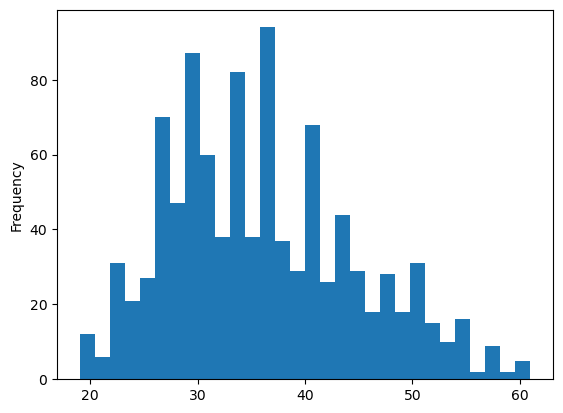

In [37]:
# Create a Histogram of the Age
ad_data['Age'].plot.hist(bins=30)

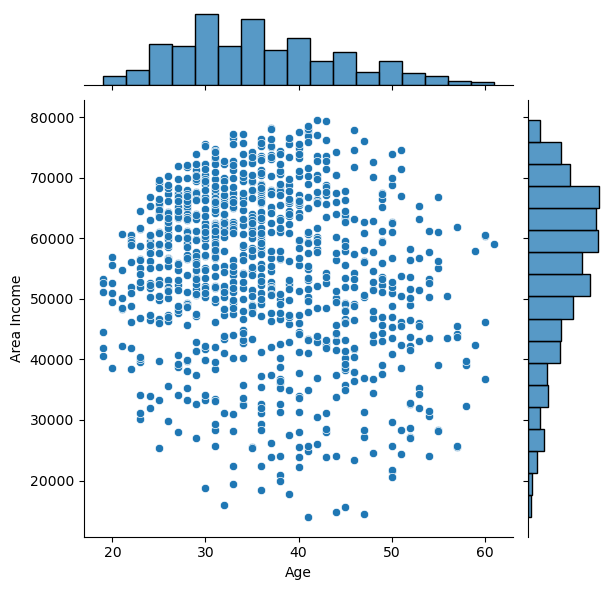

In [38]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)
plt.show()

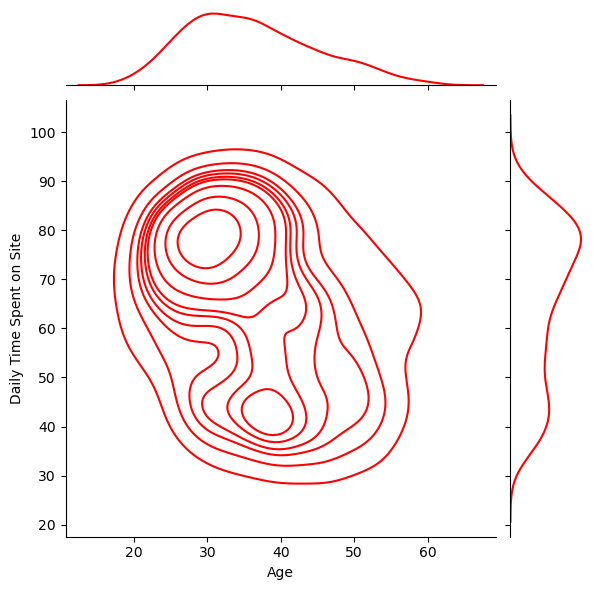

In [40]:
#Create a joinplot showing the kde distributionof Daily Time Spent on Site vs Age
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red')
plt.show()

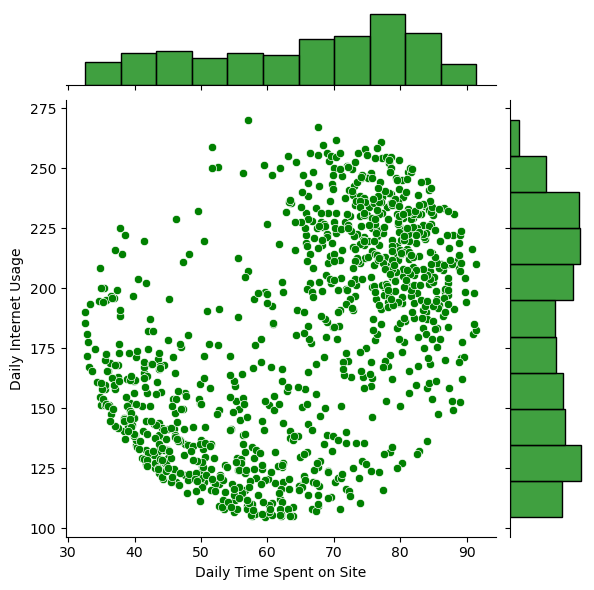

In [42]:
#Created a Jointplot of Daily Time Spent on Site vs Daily Internet Usage
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')

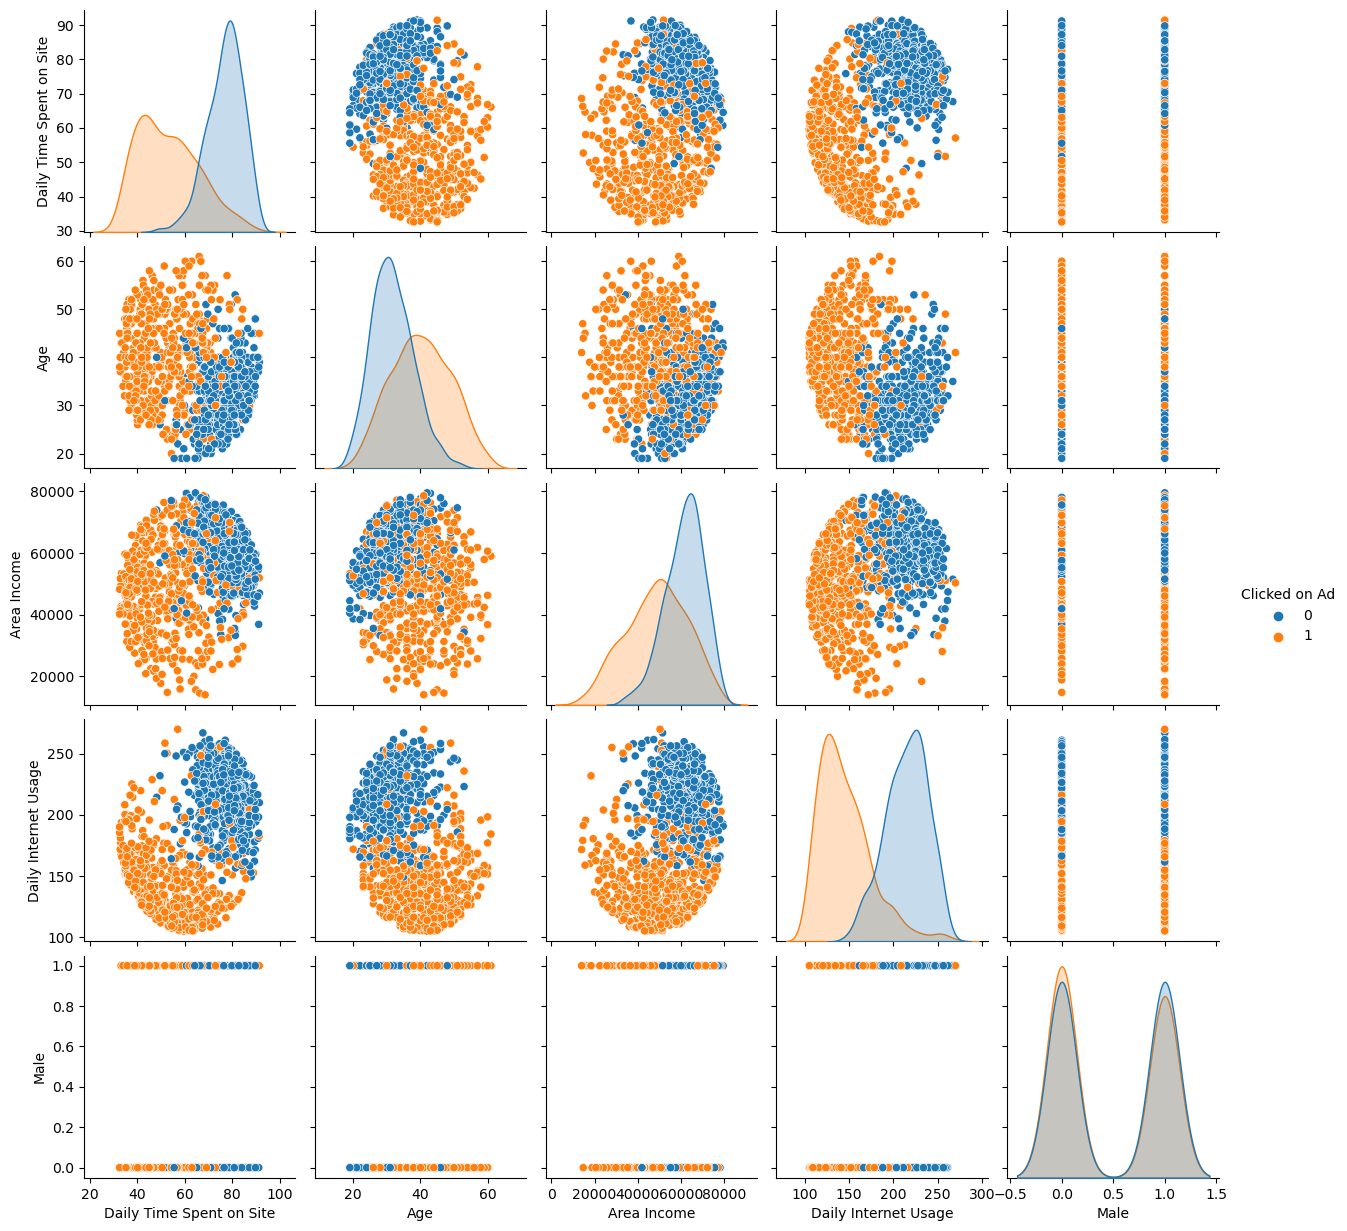

In [43]:
#Create a  pairplot with the hue defined by the ‘Clicked on Ad column feature
sns.pairplot(ad_data,hue='Clicked on Ad')

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Exclude non-numeric and non-binary columns
X = ad_data.drop(['Clicked on Ad', 'Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)
y = ad_data['Clicked on Ad']

In [47]:
# Initialize the model
model = RandomForestClassifier()

In [48]:
# Fit the model
model.fit(X, y)

RandomForestClassifier()

In [49]:
# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [50]:
# Display the feature importances
print(feature_importances)

                          Importance
Daily Internet Usage        0.458574
Daily Time Spent on Site    0.340418
Area Income                 0.108678
Age                         0.087100
Male                        0.005230


In [58]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Timestamp,Clicked on Ad,Male
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,3/27/2016 0:53,0,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Nauru,4/4/2016 1:39,0,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,San Marino,3/13/2016 20:35,0,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,1/10/2016 2:31,0,1
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Iceland,6/3/2016 3:36,0,0


In [55]:
#Logistic Regression
#Train test split and train the model
from sklearn.model_selection import train_test_split

In [66]:
X= ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y= ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
# Train and fit the logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


In [83]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\mnank\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predictions

In [74]:
predictions = logmodel.predict(X_test)

In [84]:
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [75]:
#Create Classification report and Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       157
           1       0.96      0.98      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

[[151   6]
 [  3 140]]


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [86]:
# Drop non-numeric and non-binary columns and columns that won't contribute much
X = ad_data.drop(['Clicked on Ad', 'Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)
y = ad_data['Clicked on Ad']

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Initialize the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

In [89]:
# Fit the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [90]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [91]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [92]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [93]:
# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.91
Confusion Matrix:
 [[ 79  10]
 [  8 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        89
           1       0.91      0.93      0.92       111

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [ ]:
Desci